In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('D:\Ptich chuoi thoi gian\TH1\Gia SMP va SMPcap 2021.csv')
df.head(5)

,Ngay,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/5/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [119]:
feats = ['9', '10']

In [120]:
df[feats].head()

,9,10
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1002.1,1002.1
4,1061.5,1061.5


### 1. EDA dữ liệu

1.1. Kiểm tra dữ liệu thiếu

In [121]:
df[feats].isna().mean()

9     0.0
10    0.0
dtype: float64

- 2 cột đều không có dữ liệu thiếu

1.2. Sử dụng biểu đồ heatmap đề kiểm tra độ tương quan của dữ liệu

<Axes: >

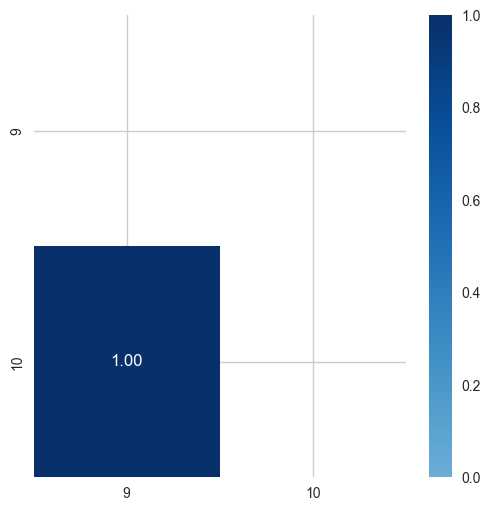

In [122]:
mask = np.triu(np.ones_like(df[feats].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df[feats].corr(), mask=mask, vmax=1, vmin=0, center=0,annot=True,fmt='.2f', cmap="Blues")

- Biểu đồ cho thấy 2 cột có độ tương quan dương và rất tương quan

1.3. Biểu đồ đường thể hiện dữ liệu qua thời gian

In [123]:
import plotly.express as px
fig = px.line(y=df['9'], x=df['Ngay'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngay", 
                  yaxis_title="Cột 9",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(600,500,0,3.8)')

In [124]:
fig = px.line(y=df['10'], x=df['Ngay'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 2",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

- Scale dữ liệu

In [125]:
transformer = StandardScaler()
X = transformer.fit_transform(np.array(df[feats]))

- Dữ liệu sau khi scale

In [126]:
X[:5]

array([[-0.7225876 , -0.72258362],
       [-0.19596525, -0.19596226],
       [-0.49403541, -0.49403186],
       [-0.36357019, -0.36356689],
       [ 0.2020965 ,  0.20209872]])

- Sử dụng phương pháp Elbow để xác định số cụm thông qua KMeans
- Chạy số cụm từ 3-12 xem số cụm nào có sự phân chia cụm có điểm số cao nhất

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\AppData\Local\Packages\PythonSo

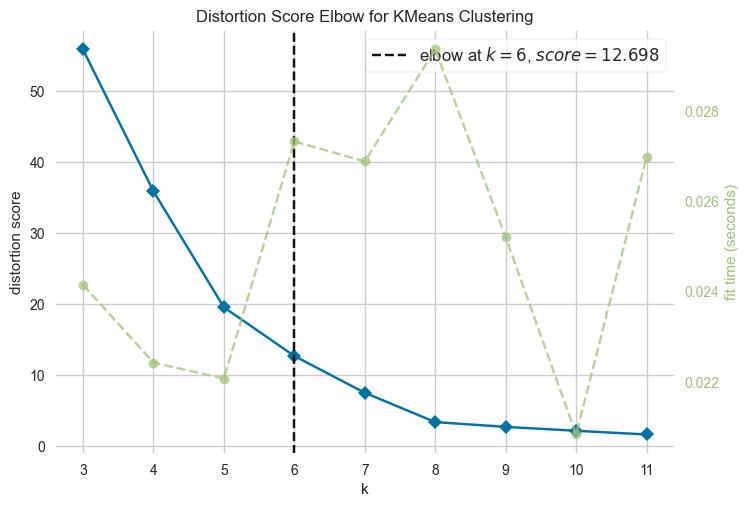

In [127]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(3,12))
Elbow_M.fit(X)
Elbow_M.show();

### 2. Sử dụng Bayesian Gaussian Mixture

#### Thử nghiệm với K = 6

In [128]:
BGM = BayesianGaussianMixture(n_components=6,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [129]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(6)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(6):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

- Tạo bộ phân loại

In [130]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.000177301
[400]	valid_0's multi_logloss: 0.000177301
[200]	valid_0's multi_logloss: 0.000222285
[400]	valid_0's multi_logloss: 0.000222285
[200]	valid_0's multi_logloss: 0.000215846
[400]	valid_0's multi_logloss: 0.000215846
[200]	valid_0's multi_logloss: 1.15983e-05
[400]	valid_0's multi_logloss: 1.15469e-05
[600]	valid_0's multi_logloss: 1.15131e-05
[800]	valid_0's multi_logloss: 1.14892e-05
[1000]	valid_0's multi_logloss: 1.14716e-05
[1200]	valid_0's multi_logloss: 1.14579e-05
[1400]	valid_0's multi_logloss: 1.14471e-05
[1600]	valid_0's multi_logloss: 1.14384e-05
[1800]	valid_0's multi_logloss: 1.14311e-05
[2000]	valid_0's multi_logloss: 1.1425e-05
[2200]	valid_0's multi_logloss: 1.14197e-05
[2400]	valid_0's multi_logloss: 1.14152e-05
[2600]	valid_0's multi_logloss: 1.14113e-05
[2800]	valid_0's multi_logloss: 1.14078e-05
[3000]	valid_0's multi_logloss: 1.14048e-05
[3200]	valid_0's multi_logloss: 1.14021e-05
[3400]	valid_0's multi_logloss: 1.13996e-05

In [131]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [132]:
labels=np.argmax(lgb_preds,axis=1)

- Nhãn của từng điểm dữ liệu sau khi training xong

In [133]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

- Có 3 nhãn tương ứng 3 cụm

C:\Users\Admin\AppData\Local\Temp\ipykernel_5128\1910150372.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



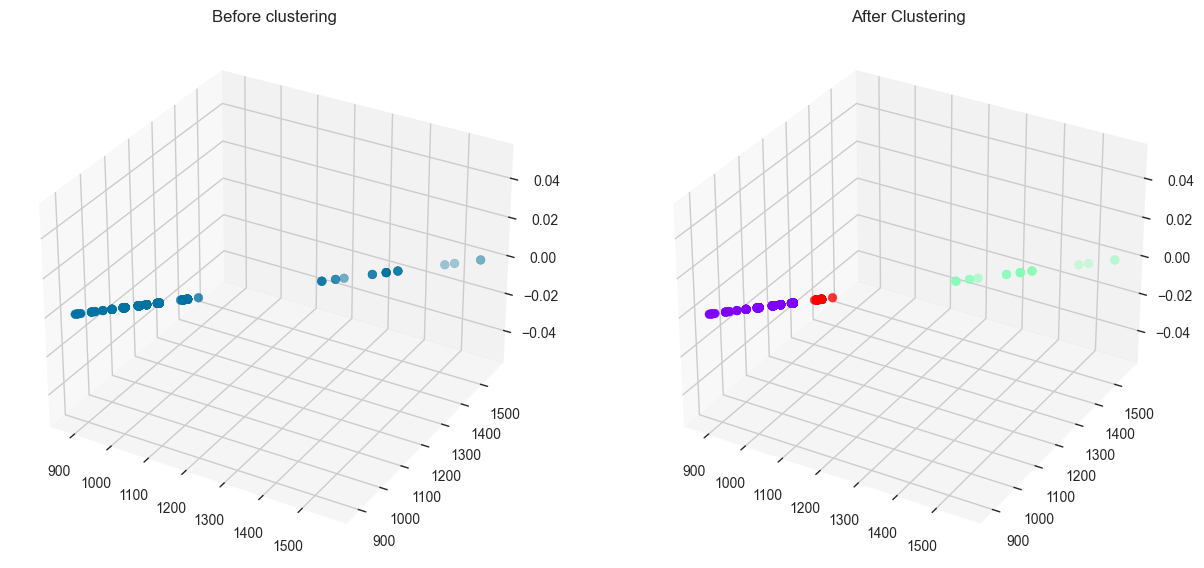

In [134]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['9'], df['10'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['9'], df['10'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

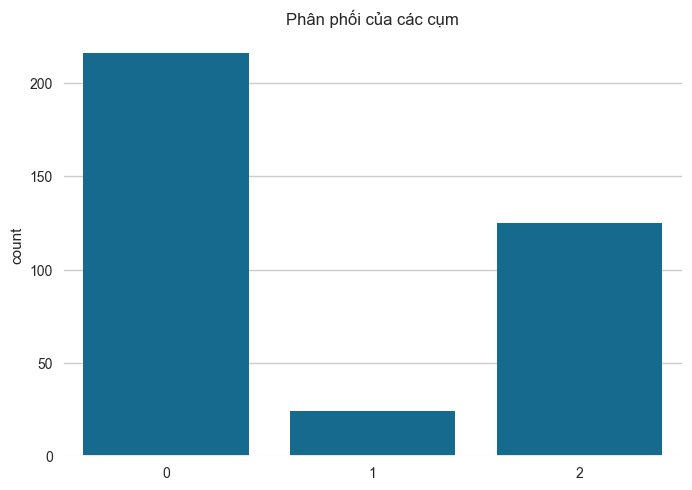

In [135]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

- Từ phân phối => các cụm được phân chia chưa đồng đều

#### Thử nghiệm với k=4

In [136]:
BGM = BayesianGaussianMixture(n_components=4,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [137]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(4)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(4):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

- Tạo bộ phân loại

In [138]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.000178168
[400]	valid_0's multi_logloss: 0.000178168
[200]	valid_0's multi_logloss: 0.000223548
[400]	valid_0's multi_logloss: 0.000223548
[200]	valid_0's multi_logloss: 0.000215846
[400]	valid_0's multi_logloss: 0.000215846
[200]	valid_0's multi_logloss: 1.11267e-05
[400]	valid_0's multi_logloss: 1.10783e-05
[600]	valid_0's multi_logloss: 1.10462e-05
[800]	valid_0's multi_logloss: 1.10235e-05
[1000]	valid_0's multi_logloss: 1.10066e-05
[1200]	valid_0's multi_logloss: 1.09935e-05
[1400]	valid_0's multi_logloss: 1.09831e-05
[1600]	valid_0's multi_logloss: 1.09746e-05
[1800]	valid_0's multi_logloss: 1.09675e-05
[2000]	valid_0's multi_logloss: 1.09616e-05
[2200]	valid_0's multi_logloss: 1.09565e-05
[2400]	valid_0's multi_logloss: 1.09522e-05
[2600]	valid_0's multi_logloss: 1.09483e-05
[2800]	valid_0's multi_logloss: 1.0945e-05
[3000]	valid_0's multi_logloss: 1.0942e-05
[3200]	valid_0's multi_logloss: 1.09393e-05
[3400]	valid_0's multi_logloss: 1.0937e-05
[

In [139]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

- Nhãn sau khi phân loại có 3 nhãn

In [140]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5128\1910150372.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



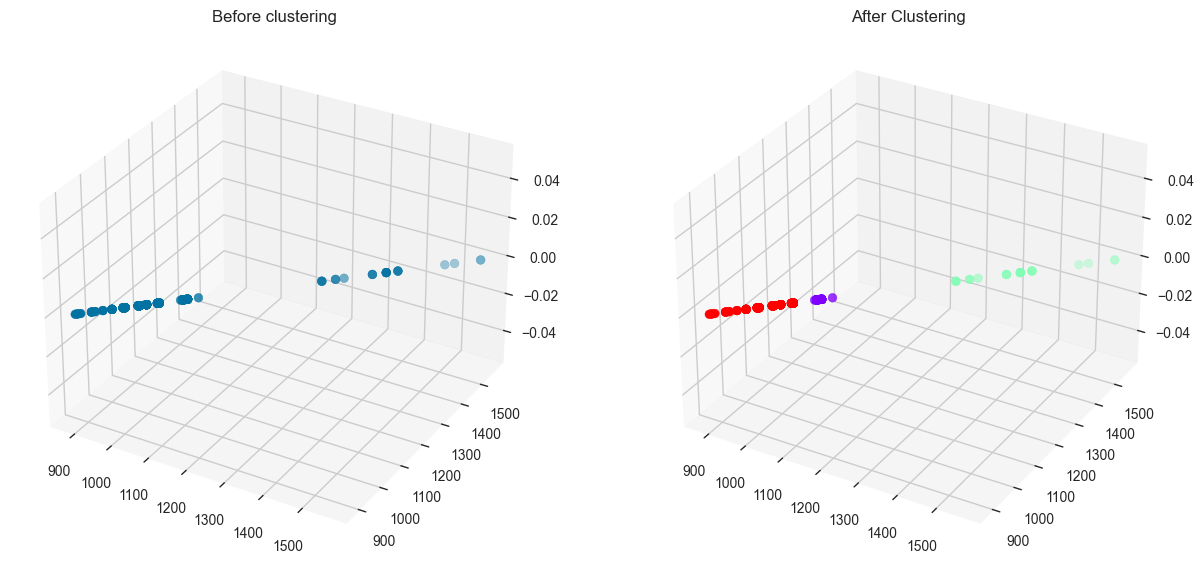

In [141]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['9'], df['10'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['9'], df['10'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

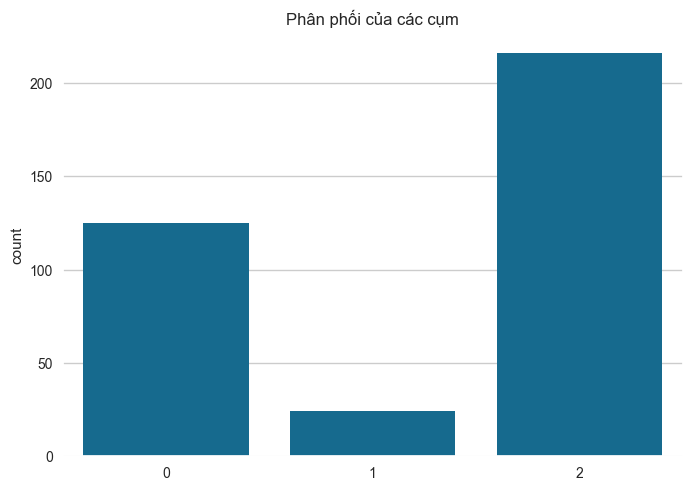

In [142]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

- Từ biểu đồ số cụm đã được phân chia đồng đều hơn

#### Thử nghiệm với K=3

In [143]:
BGM = BayesianGaussianMixture(n_components=3,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [144]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(3)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(3):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [145]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.000177301
[400]	valid_0's multi_logloss: 0.000177301
[200]	valid_0's multi_logloss: 0.000222285
[400]	valid_0's multi_logloss: 0.000222285
[200]	valid_0's multi_logloss: 0.000215846
[400]	valid_0's multi_logloss: 0.000215846
[200]	valid_0's multi_logloss: 1.15983e-05
[400]	valid_0's multi_logloss: 1.15469e-05
[600]	valid_0's multi_logloss: 1.15131e-05
[800]	valid_0's multi_logloss: 1.14892e-05
[1000]	valid_0's multi_logloss: 1.14716e-05
[1200]	valid_0's multi_logloss: 1.14579e-05
[1400]	valid_0's multi_logloss: 1.14471e-05
[1600]	valid_0's multi_logloss: 1.14384e-05
[1800]	valid_0's multi_logloss: 1.14311e-05
[2000]	valid_0's multi_logloss: 1.1425e-05
[2200]	valid_0's multi_logloss: 1.14197e-05
[2400]	valid_0's multi_logloss: 1.14152e-05
[2600]	valid_0's multi_logloss: 1.14113e-05
[2800]	valid_0's multi_logloss: 1.14078e-05
[3000]	valid_0's multi_logloss: 1.14048e-05
[3200]	valid_0's multi_logloss: 1.14021e-05
[3400]	valid_0's multi_logloss: 1.13996e-05

In [146]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [147]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5128\1910150372.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



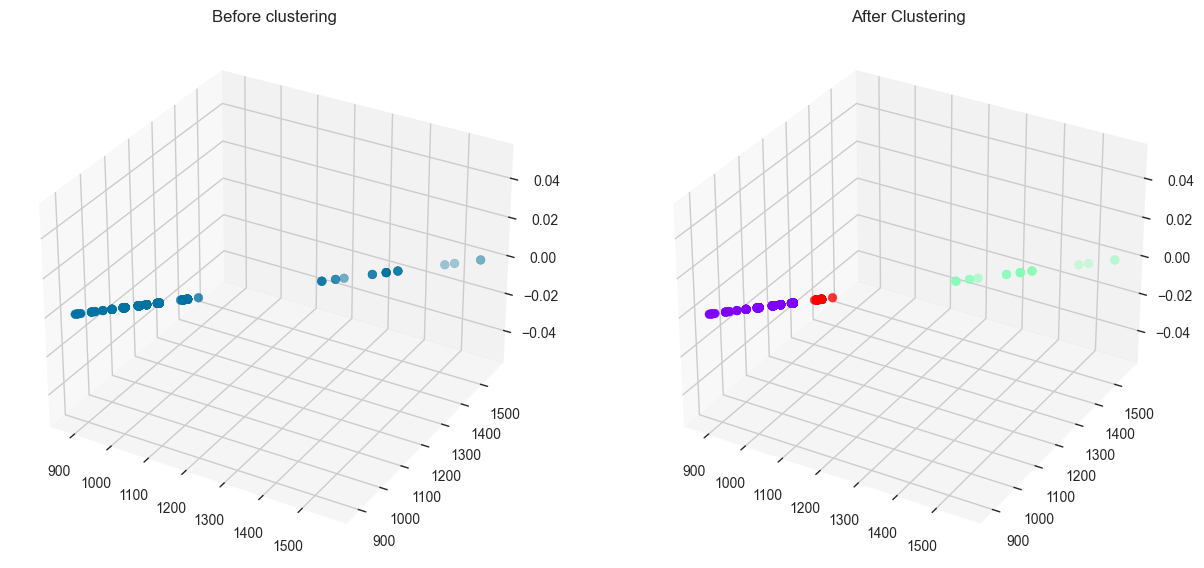

In [148]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['9'], df['10'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['9'], df['10'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

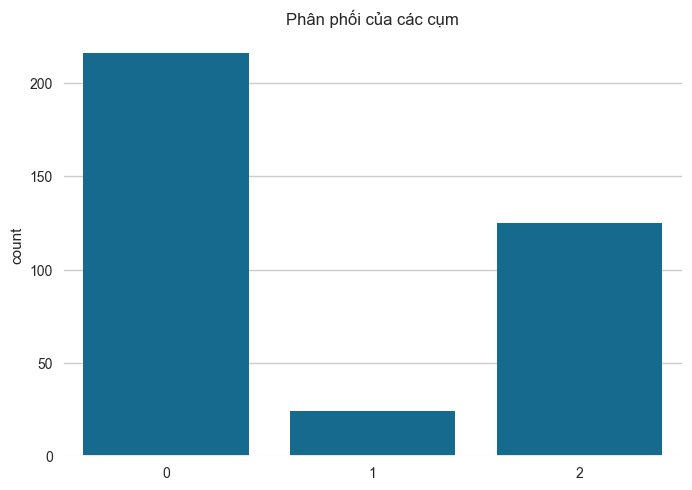

In [149]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

### 3. Sử dụng GRU để dự đoán giá trị tương lai

In [150]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import GRU

In [151]:
feats = ['Ngay', '9', '10']

In [152]:
df = df[feats]

In [153]:
df

,Ngay,9,10
0,1/1/2021,964.4,964.4
1,1/2/2021,1019.7,1019.7
2,1/3/2021,988.4,988.4
3,1/4/2021,1002.1,1002.1
4,1/5/2021,1061.5,1061.5
...,...,...,...
360,27/12/2021,1002.0,1002.0
361,28/12/2021,1002.0,1002.0
362,29/12/2021,1061.5,1061.5
363,30/12/2021,1022.6,1022.6


- Chuyển format ngày

In [154]:
df['Ngay'] = pd.to_datetime(df['Ngay'], format='%d/%m/%Y')
df.sort_values(by='Ngay', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

- Tạo số dữ liệu test bằng tháng 12

In [155]:
test_size = df[df['Ngay'].dt.month==12].shape[0]
test_size

31

Biểu đồ thể hiện training và test trước khi dự đoán

- Biểu đồ thể hiện toàn bộ dữ liệu

In [156]:
import plotly.express as px
fig = px.line(y=df['9'], x=df['Ngay'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngay", 
                  yaxis_title="9",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

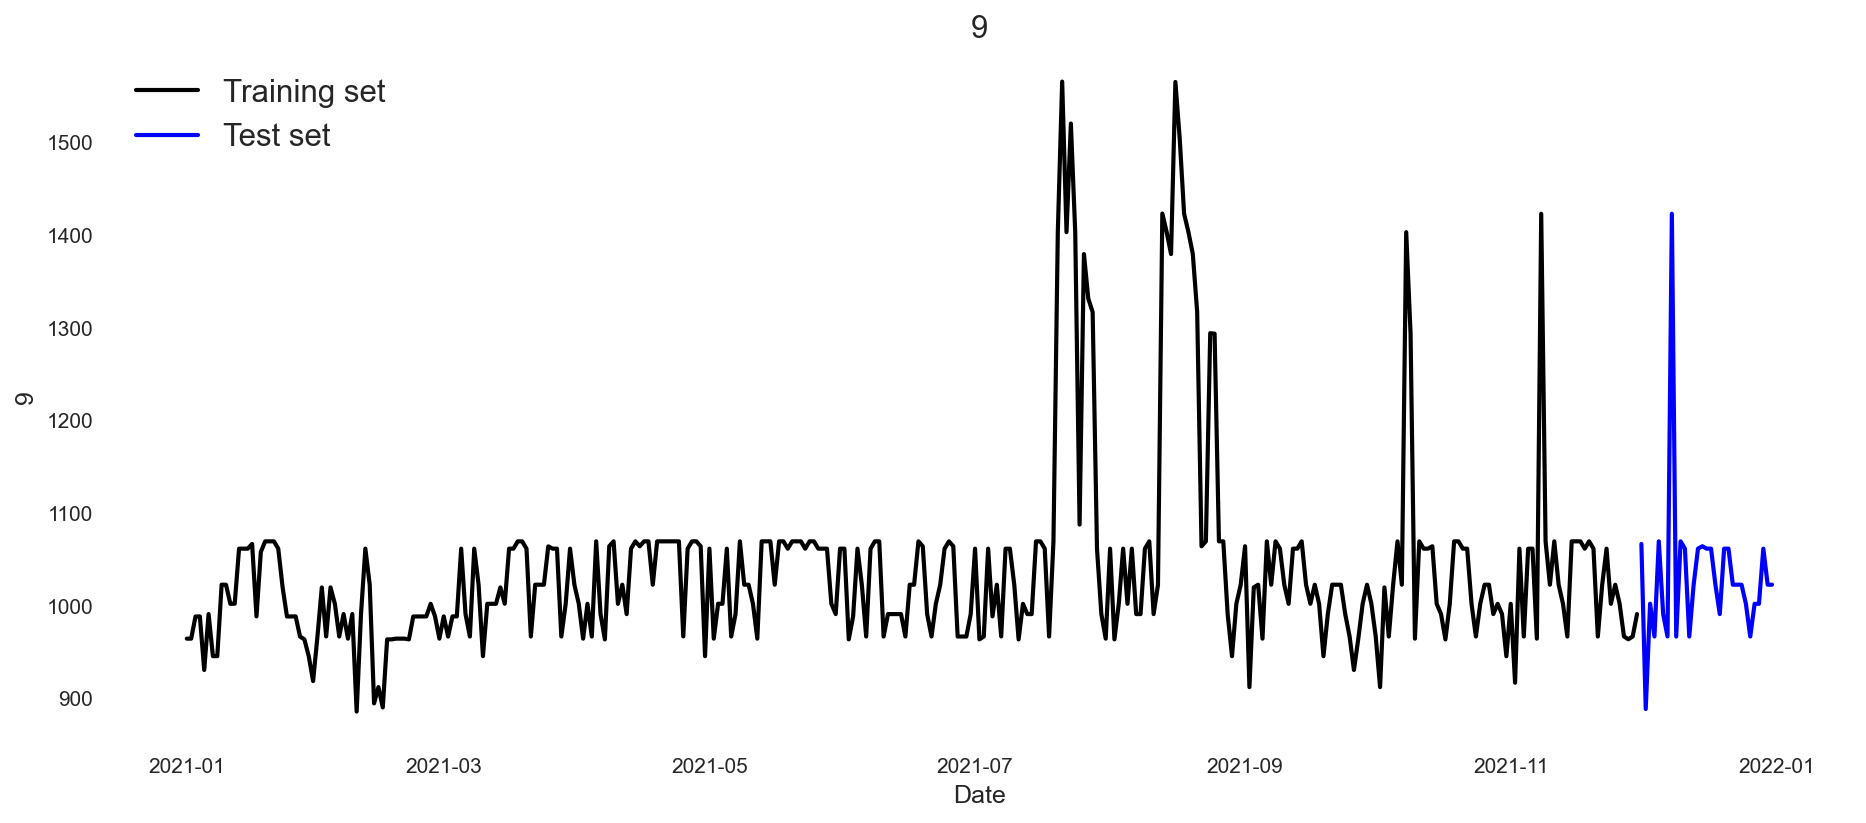

In [157]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngay'][:-test_size], df['9'][:-test_size], color='black', lw=2)
plt.plot(df['Ngay'][-test_size:], df['9'][-test_size:], color='blue', lw=2)
plt.title('9', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('9', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

- Sử dụng MinMaxScaler để đưa dữ liệu về khoảng 0-1

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['9']])

MinMaxScaler()

- Chọn window_size = 10 tức là 10 ngày dự đoán cho 1 ngày tiếp theo

In [159]:
window_size = 10

- Tạo tập training data

In [160]:
train_data = df[['9']][:-test_size]
train_data = scaler.transform(train_data)

In [161]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

- Tạo tập test data

In [162]:
test_data = df[['9']][-test_size-window_size:]
test_data = scaler.transform(test_data)

In [163]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

- Chuyển đổi dữ liệu từ dataframe, series sang numpy array

In [164]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [165]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [166]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (324, 10, 1)
y_train Shape:  (324, 1)
X_test Shape:   (31, 10, 1)
y_test Shape:   (31, 1)


- Khởi tạo model

In [167]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = GRU(units = 64, return_sequences=False)(input1)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

- Tạo bộ siêu tham số: epochs=30 (lặp 30 lần)

In [168]:
model = define_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0663 - val_loss: 0.0375
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0543 - val_loss: 0.0273
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0361 - val_loss: 0.0154
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - val_loss: 0.0157
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - val_loss: 0.0149
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - val_loss: 0.0152
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - val_loss: 0.0151
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - val_loss: 0.0151
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - val_loss: 0.0150
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - val_loss: 0.0149
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - val_loss: 0.0151
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - val_l

- Dự đoán

In [169]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [170]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [171]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)

Test Loss: 0.018302038311958313
Test MAPE: 1.8511783593594395


In [172]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

- Vẽ biểu đồ sau khi đã tự đoán

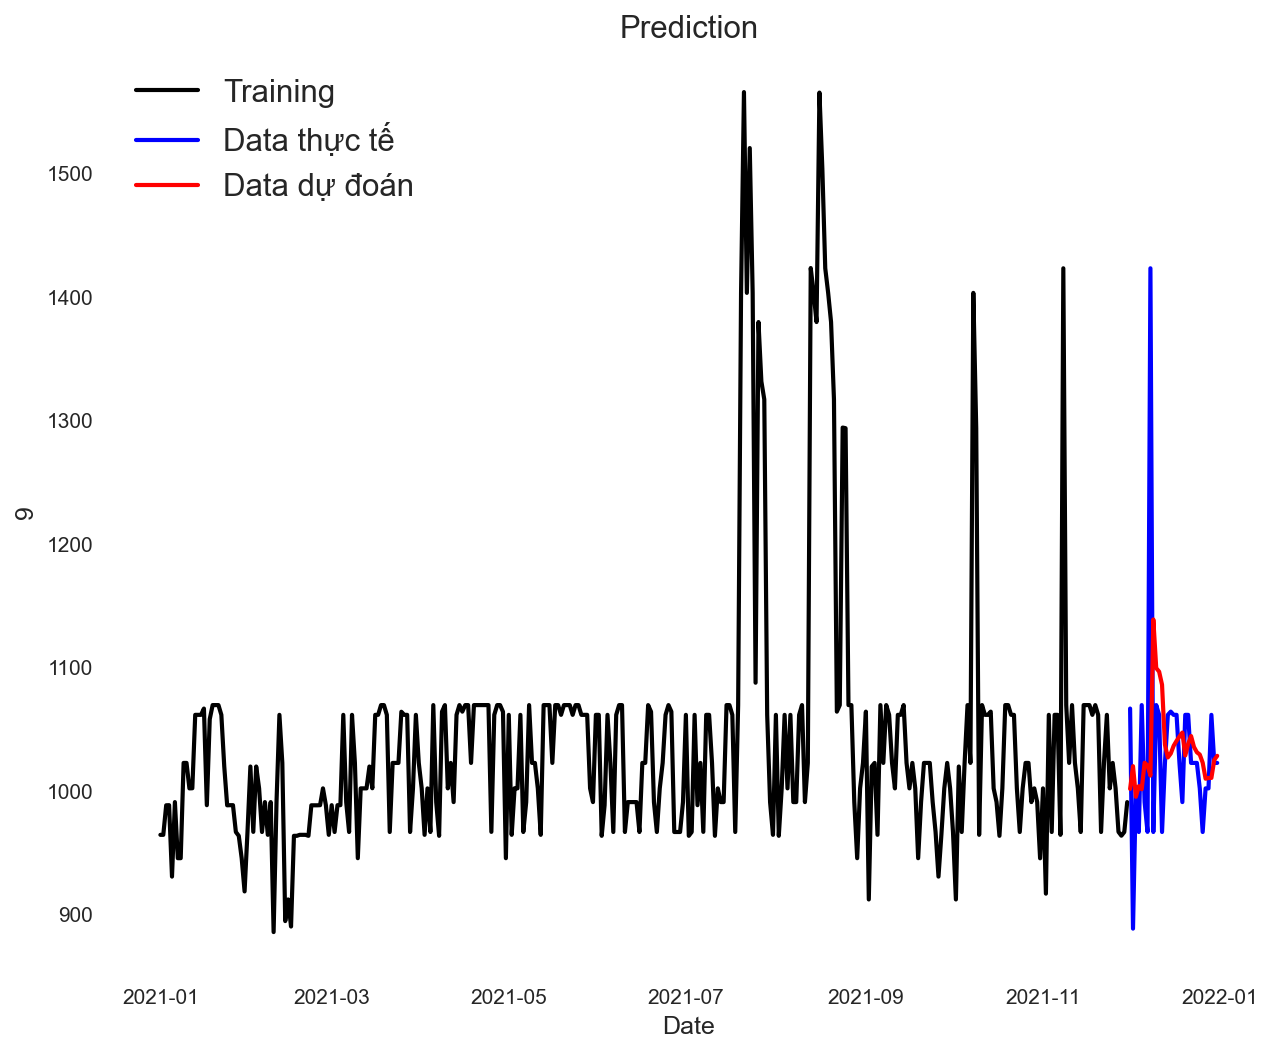

In [175]:
plt.figure(figsize=(10, 8), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngay'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Ngay'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Ngay'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('9', fontsize=12)
plt.legend(['Training', 'Data thực tế', 'Data dự đoán'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()